In [36]:
import pretty_midi
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from mido import MidiFile
import glob
import fluidsynth
import collections
from typing import Optional


In [21]:
datas = np.empty([1276,1],dtype=MidiFile)

In [22]:
years = ["2004","2006", "2008","2009", "2011", "2013", "2014", "2015","2017","2018"]
path = os.getcwd() + "\\maestro-v3.0.0\\" + "2004\\"
for i,k in enumerate(os.listdir(path)):
    mid =MidiFile( path  + k, clip=True)
    datas[i] = mid

In [23]:
files = []
for i in os.listdir(path):
    files.append(i)

In [24]:
pm = pretty_midi.PrettyMIDI(path + files[0])

In [25]:
_SAMPLING_RATE = 16000
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [26]:
display_audio(pm)

AttributeError: module 'fluidsynth' has no attribute 'Synth'

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=71, note_name=B4, duration=0.0969
1: pitch=55, note_name=G3, duration=0.2177
2: pitch=59, note_name=B3, duration=0.1677
3: pitch=62, note_name=D4, duration=0.1198
4: pitch=71, note_name=B4, duration=0.5052
5: pitch=72, note_name=C5, duration=0.0417
6: pitch=67, note_name=G4, duration=0.1969
7: pitch=74, note_name=D5, duration=0.1146
8: pitch=72, note_name=C5, duration=0.0688
9: pitch=74, note_name=D5, duration=0.0844


In [27]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file=midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [31]:
raw_notes = midi_to_notes(path + files[0])
raw_notes.head()

,pitch,start,end,step,duration
0,71,1.092708,1.189583,0.000000,0.096875
1,55,1.279167,1.496875,0.186458,0.217708
2,71,1.288542,1.793750,0.009375,0.505208
3,59,1.463542,1.631250,0.175000,0.167708
4,62,1.633333,1.753125,0.169792,0.119792


In [32]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10] 

array(['B4', 'G3', 'B4', 'B3', 'D4', 'C5', 'G4', 'D5', 'A3', 'C5'],
      dtype='<U3')

In [34]:


def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

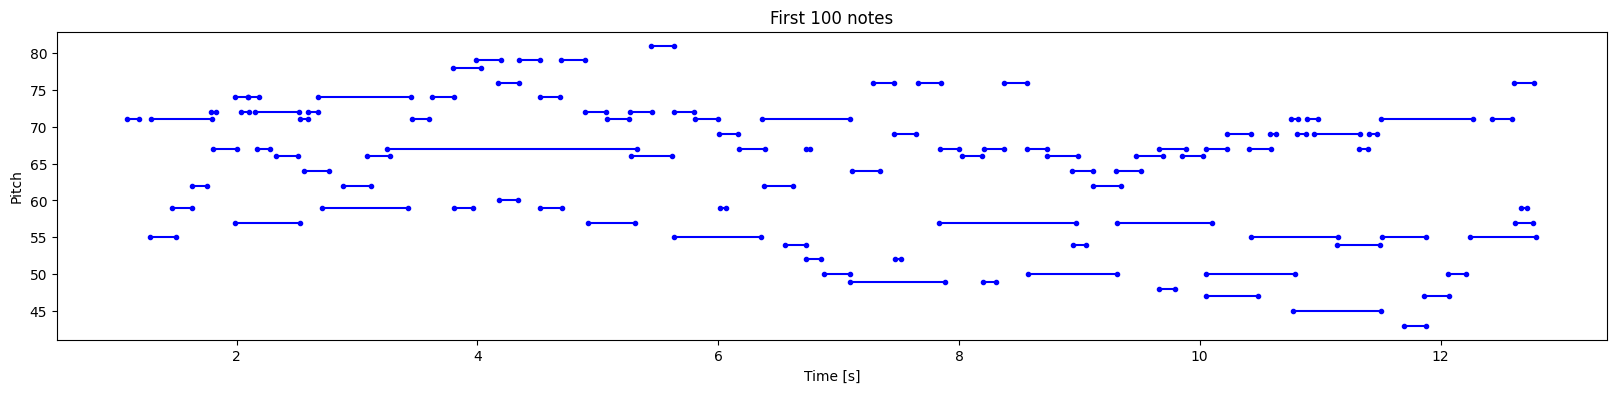

In [37]:
plot_piano_roll(raw_notes, count=100)